<a href="https://colab.research.google.com/github/Harishh247/DSA0216-CV/blob/main/cv_activity_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Extracted!
Train Folder Found: /content/dataset/train
CSV Loaded. Classes: Index(['avulsion-fracture', 'closed-simple-fracture', 'comminuted-fracture',
       'compression-crush-fracture', 'fracture-dislocation',
       'greenstick-fracture', 'hairline-fracture', 'impacted-fracture',
       'intra-articular-fracture', 'longitudinal-fracture', 'oblique-fracture',
       'open-compound-fracture', 'pathological-fracture', 'segmental-fracture',
       'spiral-fracture', 'stress-fracture', 'transverse-fracture'],
      dtype='object')


/tmp/ipython-input-3045993220.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  filename = row[0]


Images Organized into Class Folders!
Found 3181 images belonging to 17 classes.
Found 789 images belonging to 17 classes.
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 714s 7s/step - accuracy: 0.0861 - loss: 2.8737 - val_accuracy: 0.0976 - val_loss: 2.7644
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 692s 7s/step - accuracy: 0.1018 - loss: 2.7671 - val_accuracy: 0.1103 - val_loss: 2.7551
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 689s 7s/step - accuracy: 0.1198 - loss: 2.7425 - val_accuracy: 0.1115 - val_loss: 2.7628
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 688s 7s/step - accuracy: 0.1194 - loss: 2.7109 - val_accuracy: 0.0862 - val_loss: 2.7377
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 690s 7s/step - accuracy: 0.1207 - loss: 2.7076 - val_accuracy: 0.1115 - val_loss: 2.7248


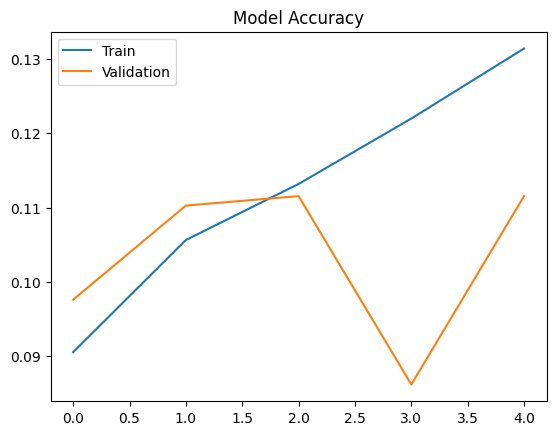

✅ Training Complete. Model Saved.


In [ ]:
# ==========================================
# USE ALREADY UPLOADED ZIP FROM SIDEBAR
# ==========================================

import zipfile
import os
import shutil
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Step 1: Define existing zip file path
zip_path = "/content/Bone fracture.v11i.multiclass.zip"

# Step 2: Extract ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

print("Dataset Extracted!")

# Step 3: Locate train folder
train_path = None
for root, dirs, files_ in os.walk("/content/dataset"):
    if "train" in dirs:
        train_path = os.path.join(root, "train")
        break

if train_path is None:
    raise Exception("Train folder not found!")

print("Train Folder Found:", train_path)

# Step 4: Read CSV
csv_file = os.path.join(train_path, "_classes.csv")
df = pd.read_csv(csv_file)

print("CSV Loaded. Classes:", df.columns[1:])

# Step 5: Create classification folder
base_dir = "/content/classification_data"
os.makedirs(base_dir, exist_ok=True)

for index, row in df.iterrows():
    filename = row[0]

    for col in df.columns[1:]:
        if row[col] == 1:
            label = col

            class_folder = os.path.join(base_dir, label)
            os.makedirs(class_folder, exist_ok=True)

            src = os.path.join(train_path, filename)
            dst = os.path.join(class_folder, filename)

            if os.path.exists(src):
                shutil.copy(src, dst)

print("Images Organized into Class Folders!")

# Step 6: Data Generator with Auto Split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Step 7: Load ResNet50
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 8: Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

# Step 9: Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

# Step 10: Save Model
model.save("bone_fracture_model.h5")
print("✅ Training Complete. Model Saved.")


In [ ]:
import os

print("Contents of /content:")
print(os.listdir('/content'))

# Check for the 'train' directory and list its contents to show class folders
train_path = '/content/train'
if os.path.exists(train_path) and os.path.isdir(train_path):
    print(f"\nContents of {train_path}:")
    print(os.listdir(train_path))

# Check for the 'valid' directory and list its contents to show class folders
val_path = '/content/valid'
if os.path.exists(val_path) and os.path.isdir(val_path):
    print(f"\nContents of {val_path}:")
    print(os.listdir(val_path))
else:
    print(f"\n'{val_path}' does not exist or is not a directory.")

# Also check for a common alternative 'val'
val_alt_path = '/content/val'
if os.path.exists(val_alt_path) and os.path.isdir(val_alt_path):
    print(f"\nContents of {val_alt_path}:")
    print(os.listdir(val_alt_path))
else:
    print(f"\n'{val_alt_path}' does not exist or is not a directory.")

Contents of /content:
['.config', 'Bone fracture.v11i.multiclass.zip', 'Bone fracture.v11i.multiclass (3).zip', 'train', 'README.dataset.txt', 'README.roboflow.txt', 'Bone fracture.v11i.multiclass (1).zip', 'Bone fracture.v11i.multiclass (2).zip', 'sample_data']

Contents of /content/train:
['1-9-_jpg.rf.e0bdb77742ba84e048aaeb9639435e04.jpg', '1-2-_jpg.rf.be5e0177621bc12c0a5a7fd4eefd9f97.jpg', '1-25-_jpg.rf.8ee80c682fb8b0bfd6d56d54002232e5.jpg', '1-17-_jpeg.rf.2acf5d44aa60369ee1bbff4524cfbf01.jpg', '1-18-_webp.rf.09a3055883ac58d88c7793eac365bc56.jpg', '1-36-_jpeg.rf.633e0e574acbf4ed8ccd2b0b796be2bf.jpg', '1-15-_jpg.rf.1b9ac5a3a2590c999720f53f04d65f1d.jpg', '1-60-_jpg.rf.735dfaabd9dc951ecb4ccf577bc2a297.jpg', '1-19-_webp.rf.bb4a19400028b9c467139fda6b769b9c.jpg', '1-51-_jpg.rf.97e94c99647a4b7434acba778d62bc09.jpg', '1-30-_jpg.rf.bfe1eb870ce8eb6cdc149145de8f4d5a.jpg', '1-65-_jpg.rf.a6b954ed36aee9e6cf80a8620097bf60.jpg', '1-17-_jpg.rf.1728011307ba599520103e4bd09cf8dd.jpg', '1-14-_jpg.rf.5c